<a href="https://colab.research.google.com/github/taegukang35/GeneticForNN/blob/main/GAforNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implement simple neural network

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

class Dense:
    def __init__(self, input_size, output_size):
        self.name = 'Dense'
        self.input = None
        self.output = None
        self.weights = np.random.randn(output_size, input_size)
        self.bias = np.random.randn(output_size, 1)

    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input) + self.bias

    def backward(self, dLdY, learning_rate):
        dLdW = np.dot(dLdY, self.input.T)
        dLdX = np.dot(self.weights.T, dLdY)
        self.weights -= learning_rate * dLdW
        self.bias -= learning_rate * dLdY
        return dLdX


class Activation:
    def __init__(self, activation, derivative):
        self.name = 'Activation'
        self.input = None
        self.activation = activation
        self.derivative = derivative

    def forward(self, input):
        self.input = input
        return self.activation(self.input)

    def backward(self, dLdX, learning_rate):
        return np.multiply(dLdX, self.derivative(self.input))


class Tanh(Activation):
    def __init__(self):
        def tanh(x): return np.tanh(x)

        def tanh_prime(x):
            return 1 - np.tanh(x) ** 2

        super().__init__(tanh, tanh_prime)


class Sigmoid(Activation):
    def __init__(self):
        def sigmoid(x): return np.tanh(x)

        def sigmoid_prime(x):
            return sigmoid(x) * (1 - sigmoid(x))

        super().__init__(sigmoid, sigmoid_prime)


def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))


def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / np.size(y_true)

#Solve XOR problem with neural network

In [ ]:
X = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y = np.array([[0], [1], [1], [0]])
X = np.reshape(X, (4, 2, 1))
Y = np.reshape(Y, (4, 1, 1))

network = [
    Dense(2, 2),
    Tanh(),
    Dense(2, 1),
    Tanh()
]

#Train neural network with backpropagation

[[ 1.67564413  2.26647999]
 [-1.63084243 -2.0349872 ]]
[[-3.14714897]
 [ 0.72296142]]
[[-1.99984016 -2.05496162]]
[[-0.72089871]]


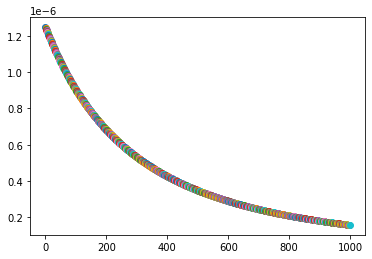

In [ ]:
epochs = 1000
learning_rate = 0.1

results = []

# train model
for i in range(epochs):
    for x, y in zip(X, Y):
        # forward pass
        output = x
        for layer in network:
            output = layer.forward(output)
        error = mse(y, output) 

        # backward pass
        grad = mse_prime(y, output)
        for layer in reversed(network):
            grad = layer.backward(grad, learning_rate)
        #print(f'{i}/{epochs}, error= {error}')
    plt.scatter(i, error)

print(network[0].weights)
print(network[0].bias)
print(network[2].weights)
print(network[2].bias)

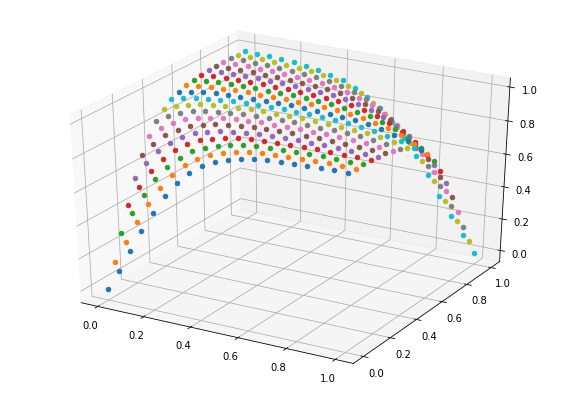

In [ ]:
def xor(x,y):
    X = np.reshape([x,y],(2,1))
    output = X
    for layer in network:
        output = layer.forward(output)
    return output[0]

x = np.linspace(0,1,20)
y = np.linspace(0,1,20)
points = [(i,j,xor(i,j)) for i in x for j in y]
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")
for point in points:
    ax.scatter3D(*point)
plt.show()

#Train neural network with genetic algorithm  

In [ ]:
import random
import numpy as np

def make_gene(network):
    gene = []
    nums = 0
    for layer in network:
        if layer.name == 'Dense':
            nums += layer.weights.shape[0]*layer.weights.shape[1]
            nums += layer.bias.shape[0]*layer.bias.shape[1]
    individual = [random.uniform(-10,10) for _ in range(nums)]
    return list(np.random.randn(nums))

def set_parameter(network, individual):
    index = 0 # index for layer
    idx = 0 # index for genes
    for layer in network:
        if layer.name == 'Dense':
            weights = individual[idx:idx+layer.weights.shape[0]*layer.weights.shape[1]]
            weights = np.array(weights)
            layer.weights = weights.reshape(*layer.weights.shape)
            idx += layer.weights.shape[0]*layer.weights.shape[1]
            
            bias = individual[idx:idx+layer.bias.shape[0]*layer.bias.shape[1]]
            bias = np.array(bias)
            layer.bias = bias.reshape(*layer.bias.shape)
            idx += layer.bias.shape[0]*layer.bias.shape[1]
            index += 1

def fitness(individual):
    # setting weights and bias
    set_parameter(network, individual)
    error = 0
    for x, y in zip(X, Y):
        # forward pass
        output = x
        for layer in network:
            output = layer.forward(output)
        error += mse(y, output)
    return error

def selection(population):
    population.sort(key=fitness)
    fittest = population[:int(len(population)*0.5)]
    return fittest

def crossover(individual1, individual2):
    offspring = individual1[:len(individual1)//2] + individual2[len(individual2)//2:]
    return offspring

def mutation(individual, probability):
    for i in range(len(individual)):
        if random.random() < probability:
            individual[i] = random.uniform(-10,10)
    return individual

def genetic_algorithm(population_size, num_generations):
    population = [make_gene(network) for _ in range(population_size)]
    for generation in range(num_generations):
        fittest = selection(population)
        plt.scatter(generation, fitness(fittest[0]))
        offspring = crossover(fittest[0],fittest[1])
        offspring = mutation(offspring, 0.01)
        population.append(offspring)
    population.sort(key=fitness)
    return population[0]

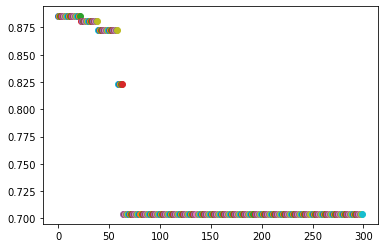

In [ ]:
set_parameter(network, genetic_algorithm(50,300))
"""print(network[0].weights)
print(network[0].bias)
print(network[2].weights)
print(network[2].bias)"""
plt.show()

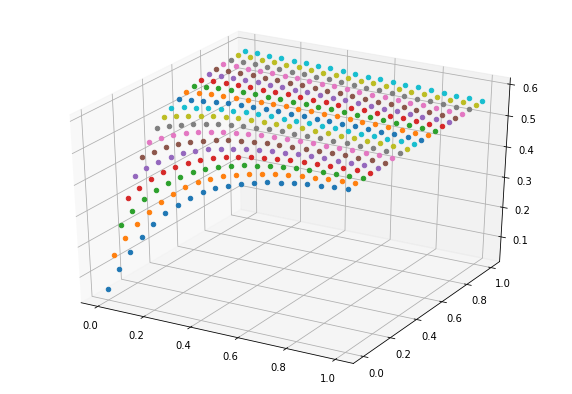

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

def xor(x,y):
    X = np.reshape([x,y],(2,1))
    output = X
    for layer in network:
        output = layer.forward(output)
    return output[0]

x = np.linspace(0,1,20)
y = np.linspace(0,1,20)
points = [(i,j,xor(i,j)) for i in x for j in y]
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")
for point in points:
    ax.scatter3D(*point)
plt.show()

#Genetic algorithm & Backpropagation 

[[-1.15993959 -1.15897142]
 [ 2.68049794  2.65879539]]
[[ 1.68099934]
 [-0.82973455]]
[[2.26298345 2.01634365]]
[[-0.73936453]]


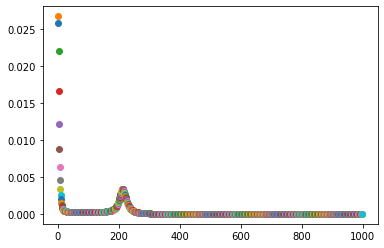

In [ ]:
epochs = 1000
learning_rate = 0.1

results = []

# train model
for i in range(epochs):
    for x, y in zip(X, Y):
        # forward pass
        output = x
        for layer in network:
            output = layer.forward(output)
        error = mse(y, output) 

        # backward pass
        grad = mse_prime(y, output)
        for layer in reversed(network):
            grad = layer.backward(grad, learning_rate)
        #print(f'{i}/{epochs}, error= {error}')
    plt.scatter(i, error)

print(network[0].weights)
print(network[0].bias)
print(network[2].weights)
print(network[2].bias)

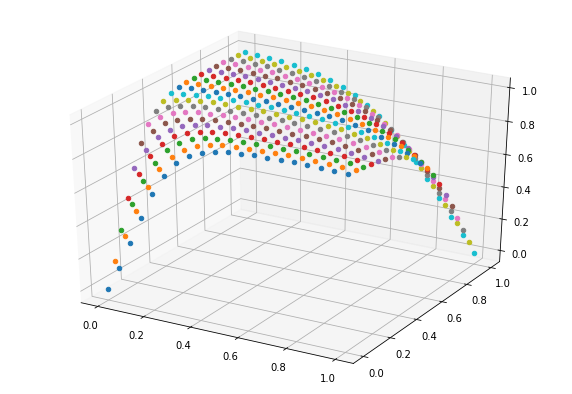

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

def xor(x,y):
    X = np.reshape([x,y],(2,1))
    output = X
    for layer in network:
        output = layer.forward(output)
    return output[0]

x = np.linspace(0,1,20)
y = np.linspace(0,1,20)
points = [(i,j,xor(i,j)) for i in x for j in y]
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")
for point in points:
    ax.scatter3D(*point)
plt.show()